In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
print("Version of tensorflow is := ",tf.__version__)

Version of tensorflow is :=  2.1.0


In [22]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
sns.set_style("darkgrid")

In [2]:
(train_data , train_label) , (test_data , test_label) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 5s 2us/step


In [3]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 2s 4us/step


In [4]:
print("Len of train_data := ",len(train_data))
print("Len of test_data := ",len(test_data))

Len of train_data :=  8982
Len of test_data :=  2246


In [6]:
rev_word_index = {}
for k,v in word_index.items():
    rev_word_index[v] = k

In [7]:
rev_word_index[9999]

'oversold'

In [8]:
word_index['oversold']

9999

In [9]:
def seq_to_str(Sequence):
    str_ = ""
    for seq in Sequence:
        str_ += rev_word_index[seq] + " "
    str_ = str_[:-1]+"."
    return str_

In [12]:
print("11th string of train data := ",seq_to_str(train_data[10]))

11th string of train data :=  the federal gain only growth lt they meeting year reuter company did year an they ground edouard reuter company 608 653 1987 had autumn objectives reuter had profits 653 pct dlrs.


In [14]:
y_train = tf.keras.utils.to_categorical(train_label)
y_test  = tf.keras.utils.to_categorical(test_label)

In [15]:
y_train[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
print("Starting class := ",min(train_label))
print("Ending class := ",  max(train_label))
print("Total class := ",max(train_label) - min(train_label) + 1)

Starting class :=  0
Ending class :=  45
Total class :=  46


In [28]:
maxlen     = 10000
padding    = "post"
truncating = "post"
emb_dim    = 32
num_words  = 10000

In [26]:
x_train = pad_sequences(train_data,maxlen=maxlen,padding=padding,truncating=truncating)
x_test  = pad_sequences(test_data  ,maxlen=maxlen,padding=padding,truncating=truncating)

In [27]:
print("Shape of x_train := ",x_train.shape)
print("Shape of y_train := ",y_train.shape)
print("Shape of x_test  := ",x_test.shape)
print("Shape of y_test  := ",y_test.shape)

Shape of x_train :=  (8982, 10000)
Shape of y_train :=  (8982, 46)
Shape of x_test  :=  (2246, 10000)
Shape of y_test  :=  (2246, 46)


In [34]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,emb_dim,input_length = maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(46,activation="softmax"),
])

In [35]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 32)         320000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
Total params: 329,262
Trainable params: 329,262
Non-trainable params: 0
_________________________________________________________________


In [36]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001) ,
               loss = tf.keras.losses.categorical_crossentropy ,
               metrics = ['acc'])

In [37]:
his1 = model1.fit(x_train,y_train, epochs = 20 , batch_size = 512 ,
                  validation_data = (x_test , y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 95s 11ms/sample - loss: 3.6692 - acc: 0.3330 - val_loss: 3.4268 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 56s 6ms/sample - loss: 3.1320 - acc: 0.3517 - val_loss: 2.7802 - val_acc: 0.3620
Epoch 3/20
8982/8982 [==============================] - 51s 6ms/sample - loss: 2.6054 - acc: 0.3517 - val_loss: 2.4871 - val_acc: 0.3620
Epoch 4/20
8982/8982 [==============================] - 51s 6ms/sample - loss: 2.4485 - acc: 0.3517 - val_loss: 2.4289 - val_acc: 0.3620
Epoch 5/20
8982/8982 [==============================] - 71s 8ms/sample - loss: 2.4133 - acc: 0.3517 - val_loss: 2.4173 - val_acc: 0.3620
Epoch 6/20
8982/8982 [==============================] - 112s 12ms/sample - loss: 2.4044 - acc: 0.3517 - val_loss: 2.4094 - val_acc: 0.3620
Epoch 7/20
8982/8982 [==============================] - 52s 6ms/sample - loss: 2.3996 - acc: 0.3517 - val_loss: 2.4066 - val_ac

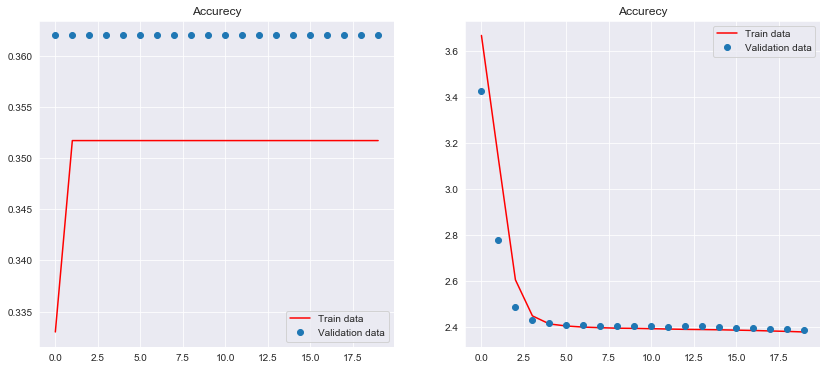

In [40]:
fig , ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(his1.history['acc'],'r',label="Train data")
ax[0].plot(his1.history['val_acc'],'o',label="Validation data")
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his1.history['loss'],'r',label="Train data")
ax[1].plot(his1.history['val_loss'],'o',label="Validation data")
ax[1].set_title("Accurecy")
ax[1].legend()

Shape of x_train :=  (8982, 120)
Shape of y_train :=  (8982, 46)
Shape of x_test  :=  (2246, 120)
Shape of y_test  :=  (2246, 46)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 46)                2990      
Total params: 329,262
Trainable params: 329,262
Non-trainable params: 0
__________________________________________________

8982/8982 [==============================] - 1s 90us/sample - loss: 0.4403 - acc: 0.8882 - val_loss: 1.4245 - val_acc: 0.7244
Epoch 52/80
8982/8982 [==============================] - 1s 86us/sample - loss: 0.4256 - acc: 0.8938 - val_loss: 1.4319 - val_acc: 0.7266
Epoch 53/80
8982/8982 [==============================] - 1s 103us/sample - loss: 0.4146 - acc: 0.8937 - val_loss: 1.4653 - val_acc: 0.7275
Epoch 54/80
8982/8982 [==============================] - 1s 86us/sample - loss: 0.4025 - acc: 0.8988 - val_loss: 1.4459 - val_acc: 0.7271
Epoch 55/80
8982/8982 [==============================] - 1s 88us/sample - loss: 0.3906 - acc: 0.9055 - val_loss: 1.4898 - val_acc: 0.7257
Epoch 56/80
8982/8982 [==============================] - 1s 83us/sample - loss: 0.3785 - acc: 0.9063 - val_loss: 1.4980 - val_acc: 0.7262
Epoch 57/80
8982/8982 [==============================] - 1s 103us/sample - loss: 0.3693 - acc: 0.9081 - val_loss: 1.5110 - val_acc: 0.7293
Epoch 58/80
8982/8982 [=====================

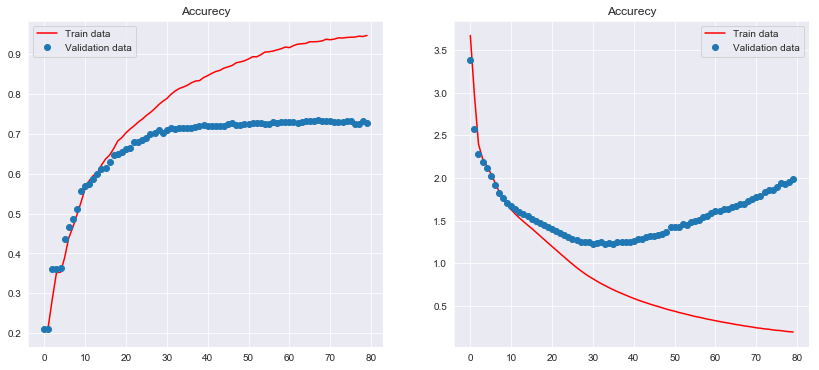

In [42]:
maxlen     = 120
padding    = "post"
truncating = "post"
emb_dim    = 32
num_words  = 10000

x_train = pad_sequences(train_data,maxlen=maxlen,padding=padding,truncating=truncating)
x_test  = pad_sequences(test_data  ,maxlen=maxlen,padding=padding,truncating=truncating)

print("Shape of x_train := ",x_train.shape)
print("Shape of y_train := ",y_train.shape)
print("Shape of x_test  := ",x_test.shape)
print("Shape of y_test  := ",y_test.shape)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,emb_dim,input_length = maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(46,activation="softmax"),
])

model2.summary()

model2.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001) ,
               loss = tf.keras.losses.categorical_crossentropy ,
               metrics = ['acc'])

his2 = model2.fit(x_train,y_train, epochs = 80 , batch_size = 512 ,
                  validation_data = (x_test , y_test))

fig , ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(his2.history['acc'],'r',label="Train data")
ax[0].plot(his2.history['val_acc'],'o',label="Validation data")
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his2.history['loss'],'r',label="Train data")
ax[1].plot(his2.history['val_loss'],'o',label="Validation data")
ax[1].set_title("Accurecy")
ax[1].legend()

In [43]:
maxlen     = 50
padding    = "post"
truncating = "post"
emb_dim    = 64
num_words  = 10000

x_train = pad_sequences(train_data,maxlen=maxlen,padding=padding,truncating=truncating)
x_test  = pad_sequences(test_data  ,maxlen=maxlen,padding=padding,truncating=truncating)

print("Shape of x_train := ",x_train.shape)
print("Shape of y_train := ",y_train.shape)
print("Shape of x_test  := ",x_test.shape)
print("Shape of y_test  := ",y_test.shape)

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(num_words,emb_dim,input_length = maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(46,activation="softmax"),
])

model3.summary()

model3.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001) ,
               loss = tf.keras.losses.categorical_crossentropy ,
               metrics = ['acc'])

his3 = model3.fit(x_train,y_train, epochs = 80 , batch_size = 512 ,
                  validation_data = (x_test , y_test))

Shape of x_train :=  (8982, 50)
Shape of y_train :=  (8982, 46)
Shape of x_test  :=  (2246, 50)
Shape of y_test  :=  (2246, 46)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 64)            640000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 46)                2990      
Total params: 651,310
Trainable params: 651,310
Non-trainable params: 0
____________________________________________________

Epoch 52/80
8982/8982 [==============================] - 1s 70us/sample - loss: 0.1734 - acc: 0.9510 - val_loss: 1.8026 - val_acc: 0.7453
Epoch 53/80
8982/8982 [==============================] - 1s 72us/sample - loss: 0.1673 - acc: 0.9520 - val_loss: 1.7463 - val_acc: 0.7480
Epoch 54/80
8982/8982 [==============================] - 1s 69us/sample - loss: 0.1626 - acc: 0.9510 - val_loss: 1.7993 - val_acc: 0.7489
Epoch 55/80
8982/8982 [==============================] - 1s 69us/sample - loss: 0.1577 - acc: 0.9522 - val_loss: 1.7504 - val_acc: 0.7480
Epoch 56/80
8982/8982 [==============================] - 1s 78us/sample - loss: 0.1550 - acc: 0.9519 - val_loss: 1.7975 - val_acc: 0.7502
Epoch 57/80
8982/8982 [==============================] - 1s 76us/sample - loss: 0.1510 - acc: 0.9520 - val_loss: 1.8572 - val_acc: 0.7449
Epoch 58/80
8982/8982 [==============================] - 1s 81us/sample - loss: 0.1467 - acc: 0.9530 - val_loss: 1.8548 - val_acc: 0.7427
Epoch 59/80
8982/8982 [===========

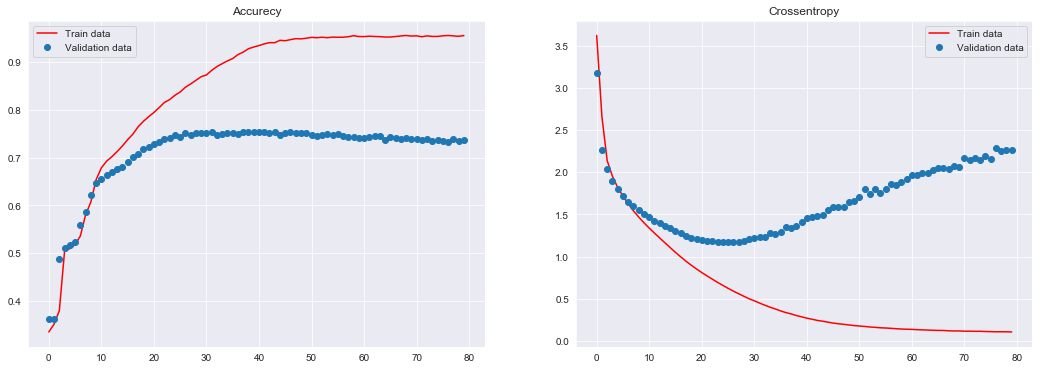

In [45]:
fig , ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(his3.history['acc'],'r',label="Train data")
ax[0].plot(his3.history['val_acc'],'o',label="Validation data")
ax[0].set_title("Accurecy")
ax[0].legend()

ax[1].plot(his3.history['loss'],'r',label="Train data")
ax[1].plot(his3.history['val_loss'],'o',label="Validation data")
ax[1].set_title("Crossentropy")
ax[1].legend()

In [55]:
print("Prediction := " , model3.predict_classes(x_train[:5]) )
print("True Value := " , ([i.argmax() for i in y_train[:5]]) )

Prediction :=  [3 4 3 4 4]
True Value :=  [3, 4, 3, 4, 4]


In [56]:
print("Prediction := " , model3.predict_classes(x_test[:5]) )
print("True Value := " , ([i.argmax() for i in y_test[:5]]) )

Prediction :=  [ 4 10  1  4 13]
True Value :=  [3, 10, 1, 4, 4]


In [58]:
import pandas as pd
Dict = {
    'SN' : ["Raj","Kiran","Jiva","Jimmi","Kiran"],
    "SA" : ['kol','kol','Del',"Mum","Raj"],
    "SADD" : [5,4,3,5,2],
    "SR" :['a','b','c','d','e'],
    "SM" : [10,50,70,80,40]
}
index = ['A','B','C','D','E']
df = pd.DataFrame(Dict,index=index)
df

,SN,SA,SADD,SR,SM
A,Raj,kol,5,a,10
B,Kiran,kol,4,b,50
C,Jiva,Del,3,c,70
D,Jimmi,Mum,5,d,80
E,Kiran,Raj,2,e,40


In [64]:
Student = {
    "Sname" : ["Raj", "Anki" , "Rishi" , "Jimmi"],
    "SAdd" : ['Kol',"Raj","Del","Kol"],
    "Sroll" : [1,2,3,4],
    "Sdept" : ["IT" , "IT" , "CSE" , "ME"]
}

df = pd.DataFrame(Student)
#Que1
print(df)
print("====================")
#Que2
print(df[['Sname','Sroll']])
df2 = df.drop(['Sdept'],axis=1)
print("====================")
#Que3
print(df2)
df['Sid'] = [500,600,700,800]
print("====================")
#Que4
print(df)

   Sname SAdd  Sroll Sdept
0    Raj  Kol      1    IT
1   Anki  Raj      2    IT
2  Rishi  Del      3   CSE
3  Jimmi  Kol      4    ME
   Sname  Sroll
0    Raj      1
1   Anki      2
2  Rishi      3
3  Jimmi      4
   Sname SAdd  Sroll
0    Raj  Kol      1
1   Anki  Raj      2
2  Rishi  Del      3
3  Jimmi  Kol      4
   Sname SAdd  Sroll Sdept  Sid
0    Raj  Kol      1    IT  500
1   Anki  Raj      2    IT  600
2  Rishi  Del      3   CSE  700
3  Jimmi  Kol      4    ME  800
